In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Reading Data

In [2]:
data = pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Missing values

In [3]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Encoding Target Variable

In [4]:
le = LabelEncoder()
cols = ['species']

for col in cols:
    data[col] = le.fit_transform(data[col])

In [5]:
data["species"].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

# features distribution

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


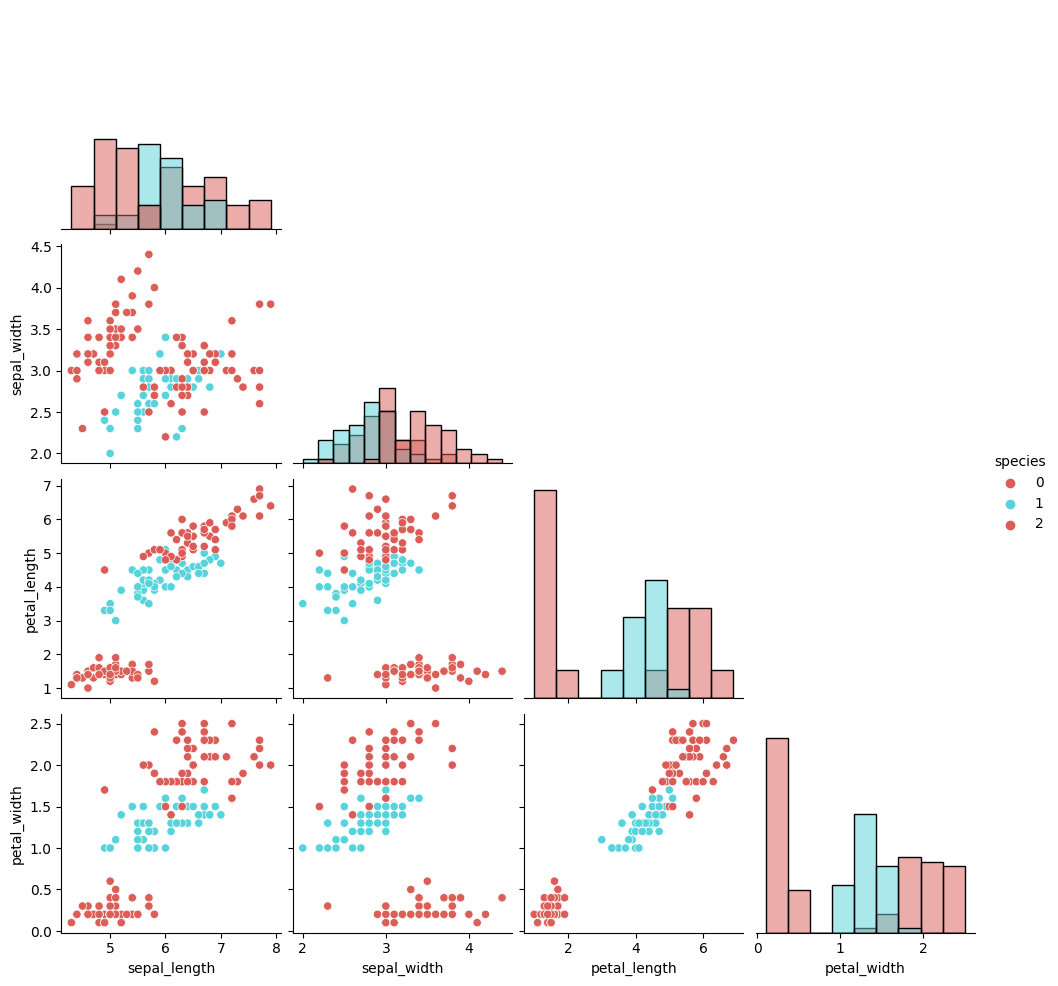

In [6]:
sns.pairplot(data , hue='species' , diag_kind="hist" , corner=True , palette = 'hls')


# data describing

In [7]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# correlation matrix

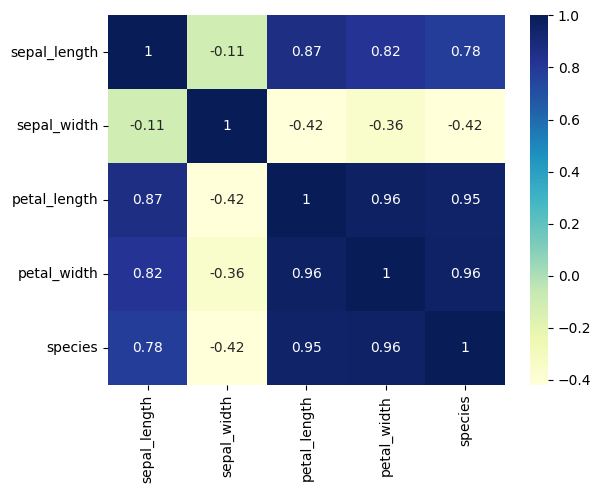

In [8]:
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True) 


# selecting features based on corelation matrix

In [9]:
cor = data.corr()

cor_target = abs(cor["species"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.05]
relevant_features

sepal_length    0.782561
sepal_width     0.419446
petal_length    0.949043
petal_width     0.956464
species         1.000000
Name: species, dtype: float64

In [10]:
X = data.drop('species', axis = 1)
Y = data['species']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42) 

# scaling data

In [12]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Random Forest Model

In [13]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [14]:
y_pred = classifier.predict(X_test_scaled)


# average training accuracy 

In [15]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_test_scaled, y = y_test, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

Accuracy: 100.00 %


# average testing accuracy 

In [16]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train_scaled, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

Accuracy: 92.64 %


# Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix')

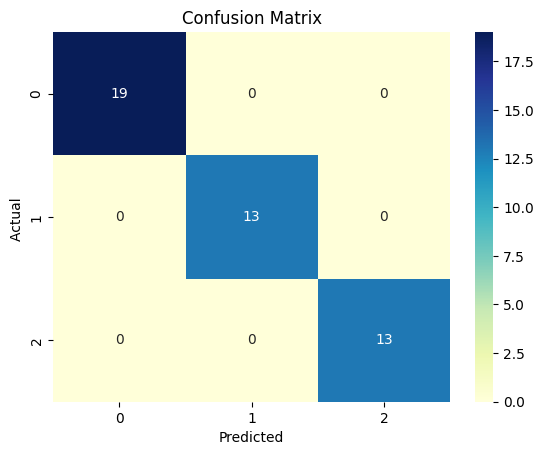

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm,annot=True, fmt='d', cmap='YlGnBu')

accuracy_score(y_test, y_pred)
plt.xlabel("Predicted")
plt.ylabel("Actual ")
plt.title("Confusion Matrix")

# Validation Curve

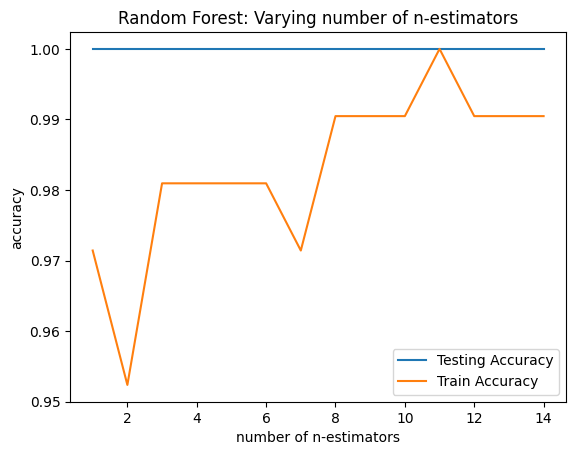

In [18]:
import matplotlib.pyplot as plt
total_train_accuracy= []
total_test_accuracy  = []
n_estimator=  np.arange(1,15)
 
for i in range(1,15):
    classifier = RandomForestClassifier(n_estimators = i, criterion = 'entropy', random_state = 0)
    classifier.fit(X_train_scaled, y_train)
    train_accuracy =classifier.score(X_train_scaled, y_train)
    test_accuracy = classifier.score(X_test_scaled, y_test)
    
    total_train_accuracy.append(train_accuracy)
    total_test_accuracy.append(test_accuracy)
plt.title('Random Forest: Varying number of n-estimators')
plt.plot(n_estimator, total_test_accuracy, label= 'Testing Accuracy')
plt.plot(n_estimator, total_train_accuracy,  label ='Train Accuracy')
plt.legend()
plt.xlabel('number of n-estimators')
plt.ylabel('accuracy')
plt.show()

# features importance

In [19]:
feature_scores = pd.Series(classifier.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

petal_width     0.504868
petal_length    0.334576
sepal_length    0.136854
sepal_width     0.023703
dtype: float64

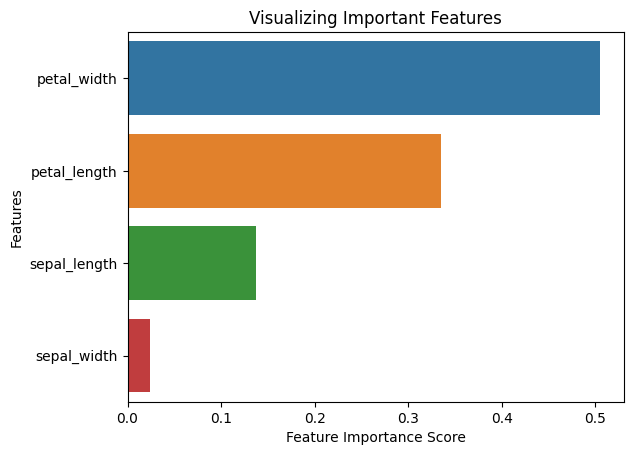

In [20]:
sns.barplot(x=feature_scores, y=feature_scores.index)

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')

plt.title("Visualizing Important Features")

plt.show()